# **PROJET MACHINE LEARNING M1 2024/2025 DATASET ACCIDENTS**

### **Nom : Mohammedi - Viallard**
### **Prénom : Kenza - Thibault**

# Exploration du dataset

In [161]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
pd.set_option('display.max_columns', None)

In [163]:
dataset = pd.read_csv('train_data_accidents.csv')
dataset.describe()
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198448 entries, 0 to 198447
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   place    198448 non-null  int64  
 1   catu     198448 non-null  int64  
 2   sexe     198448 non-null  int64  
 3   trajet   198448 non-null  int64  
 4   secu1    198448 non-null  int64  
 5   secu2    198448 non-null  int64  
 6   secu3    198448 non-null  int64  
 7   locp     198448 non-null  int64  
 8   catv     198448 non-null  int64  
 9   an_nais  193851 non-null  float64
 10  mois     198448 non-null  int64  
 11  occutc   1665 non-null    float64
 12  obs      198448 non-null  int64  
 13  obsm     198448 non-null  int64  
 14  choc     198448 non-null  int64  
 15  manv     198448 non-null  int64  
 16  lum      198448 non-null  int64  
 17  agg      198448 non-null  int64  
 18  int      198448 non-null  int64  
 19  atm      198448 non-null  int64  
 20  col      198448 non-null  

In [164]:
display(dataset)

,place,catu,sexe,trajet,secu1,secu2,secu3,locp,catv,an_nais,mois,occutc,obs,obsm,choc,manv,lum,agg,int,atm,col,catr,circ,vosp,prof,plan,surf,infra,situ,lat,long,hrmn,jour,grav
0,1,1,1,5,2,-1,-1,0,34,1970.0,9,NaN,0,2,1,1,1,2,2,1,3,3,2,0,1,1,1,0,1,50.391191,1.605050,16:35,25,3
1,2,2,2,5,1,8,-1,0,10,2001.0,6,NaN,0,2,2,1,1,2,1,1,3,4,3,1,1,1,1,0,1,43.425772,3.731132,17:20,1,1
2,1,1,1,0,2,-1,-1,0,7,1986.0,6,NaN,0,0,4,13,1,1,1,1,2,3,2,0,1,1,1,0,1,43.507931,3.720036,16:50,11,4
3,1,1,2,1,1,4,-1,-1,7,1989.0,1,NaN,0,2,4,0,3,1,1,2,4,1,3,0,1,1,2,0,1,48.911180,2.005489,18:00,29,4
4,1,1,1,9,8,0,-1,-1,7,2002.0,12,NaN,0,0,9,26,2,2,1,1,7,1,2,0,1,2,2,0,1,47.430710,-0.506032,17:35,27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198443,1,1,2,5,8,8,-1,-1,50,1980.0,7,NaN,0,2,8,1,1,2,1,1,3,4,3,1,2,1,1,0,1,43.102753,5.811474,12:55,22,1
198444,2,2,1,0,1,0,-1,-1,10,1988.0,8,NaN,0,2,7,1,1,2,2,1,3,3,1,0,1,1,1,0,1,48.914542,2.229174,10:20,18,1
198445,1,1,1,0,1,0,-1,-1,7,1997.0,7,NaN,0,2,4,1,5,1,1,1,2,1,3,0,2,1,1,0,1,48.902870,2.358630,22:40,9,4
198446,1,1,2,5,1,0,-1,0,7,1979.0,6,NaN,0,2,1,13,1,1,1,1,1,3,2,0,1,1,1,0,1,44.510370,6.079600,16:25,18,3


In [165]:
unique_hrmn = dataset['hrmn'].nunique()
print(unique_hrmn)

1367


### Distribution de la gravité des accidents

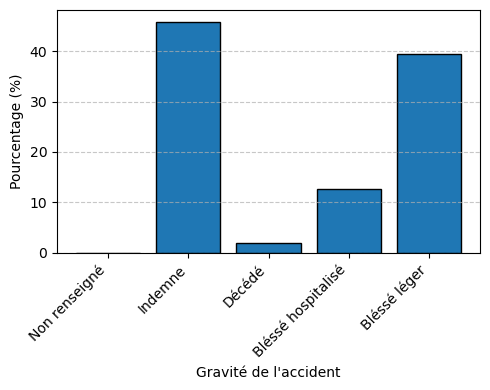

In [166]:
grav_distribution = dataset['grav'].value_counts(normalize=True) * 100

ordered_indices = [0, 1, 2, 3, 4]
ordered_labels = ['Non renseigné', 'Indemne', 'Décédé', 'Bléssé hospitalisé', 'Bléssé léger']

grav_distribution = grav_distribution.reindex(ordered_indices, fill_value=0)
plt.figure(figsize=(5, 4))
plt.bar(ordered_indices, grav_distribution.values, edgecolor='black')
plt.xticks(ordered_indices, ordered_labels, rotation=45, ha="right")

plt.xlabel("Gravité de l'accident")
plt.ylabel("Pourcentage (%)")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Observations:
* Une seule variable catégorielle à recoder, 'hrmn' -> heure et minute de l'accident
* Le dataset contient 198,448 observations et 34 features
* La variable hrmn (heure-minute de l’accident) présente 1367 valeurs uniques, ce qui montre une large dispersion des horaires d’accidents
* La distribution de la gravité des accidents montre que la majorité des incidents entraînent des blessures plutôt que des décès

In [167]:
for i in dataset.columns :
  print("Description de", i,": \n",dataset[i].value_counts(normalize=True), "\n")

Description de place : 
 place
 1     0.779600
 2     0.115995
 10    0.039890
 3     0.019965
 4     0.018302
 9     0.009206
 7     0.008325
 5     0.004414
 8     0.003099
 6     0.001124
-1     0.000081
Name: proportion, dtype: float64 

Description de catu : 
 catu
1    0.781419
2    0.178692
3    0.039890
Name: proportion, dtype: float64 

Description de sexe : 
 sexe
 1    0.669803
 2    0.307083
-1    0.023114
Name: proportion, dtype: float64 

Description de trajet : 
 trajet
 5    0.339510
 0    0.262174
 1    0.139719
 4    0.101185
 9    0.083735
 3    0.030638
-1    0.024787
 2    0.018252
Name: proportion, dtype: float64 

Description de secu1 : 
 secu1
 1    0.634171
 2    0.177885
 8    0.099351
 0    0.058050
-1    0.020978
 3    0.007256
 9    0.000826
 6    0.000761
 4    0.000509
 5    0.000186
 7    0.000025
Name: proportion, dtype: float64 

Description de secu2 : 
 secu2
-1    0.410400
 0    0.381007
 8    0.089741
 6    0.085267
 4    0.013122
 5    0.012885
 9 

In [168]:
dataset[(dataset["catu"] == 3) & (dataset["catr"] == 1)].sample(n=15)

,place,catu,sexe,trajet,secu1,secu2,secu3,locp,catv,an_nais,mois,occutc,obs,obsm,choc,manv,lum,agg,int,atm,col,catr,circ,vosp,prof,plan,surf,infra,situ,lat,long,hrmn,jour,grav
96527,10,3,1,5,0,-1,-1,6,7,2000.0,7,NaN,1,0,2,21,3,1,1,1,5,1,1,0,2,1,1,0,1,48.668154,2.355139,01:00,9,4
132649,10,3,1,0,0,-1,-1,6,10,2002.0,7,NaN,1,1,2,21,1,1,1,1,6,1,1,0,1,1,1,3,1,48.841170,2.100800,14:55,26,4
77444,10,3,2,0,0,-1,-1,1,7,1998.0,9,NaN,0,1,2,1,5,1,1,1,6,1,3,0,2,1,1,2,1,47.378383,0.713731,04:42,10,2
173818,10,3,1,9,0,0,0,1,14,2001.0,7,NaN,0,1,1,2,3,1,1,1,6,1,3,0,1,1,1,0,1,50.598949,3.179386,01:15,9,2
118237,10,3,1,5,0,-1,-1,9,7,1992.0,3,NaN,0,0,0,1,1,1,1,1,7,1,1,0,2,1,1,0,1,47.551383,2.886497,11:00,8,3
31927,10,3,1,5,0,-1,-1,6,7,1979.0,8,NaN,0,2,6,23,1,1,1,1,6,1,3,0,1,1,1,0,2,45.677821,4.958100,15:07,14,2
104716,10,3,2,4,0,-1,-1,6,7,1972.0,10,NaN,3,0,4,23,2,1,1,1,4,1,3,0,2,1,1,0,1,49.328097,2.094985,08:05,18,4
85751,10,3,1,9,8,8,-1,9,7,1980.0,3,NaN,0,1,1,2,3,1,1,1,6,1,3,0,1,1,1,2,1,50.473564,3.223561,03:54,1,2
27059,10,3,1,4,4,-1,-1,1,10,1988.0,3,NaN,0,9,8,1,1,1,1,1,6,1,1,0,1,2,1,0,1,46.185803,4.772165,09:15,18,3
182418,10,3,2,3,0,-1,-1,1,7,2009.0,8,NaN,0,1,1,12,3,1,4,2,6,1,3,0,1,1,2,0,1,-22.164564,166.387703,18:00,9,2


Au premier abord, les viles semblent être le théatre de beaucoup d'accident sans blessur, on remarque une grosse densité de point vert dans la périphérie des plus grande ville de france (Paris, Lyon, Marseille, Lille, Toulouse..) les points hors de ces agglomérations sont souvent des accidents a la gravité plus importante, et suivent en majorité les grands axes autoroutiers reliant ces métropoles.


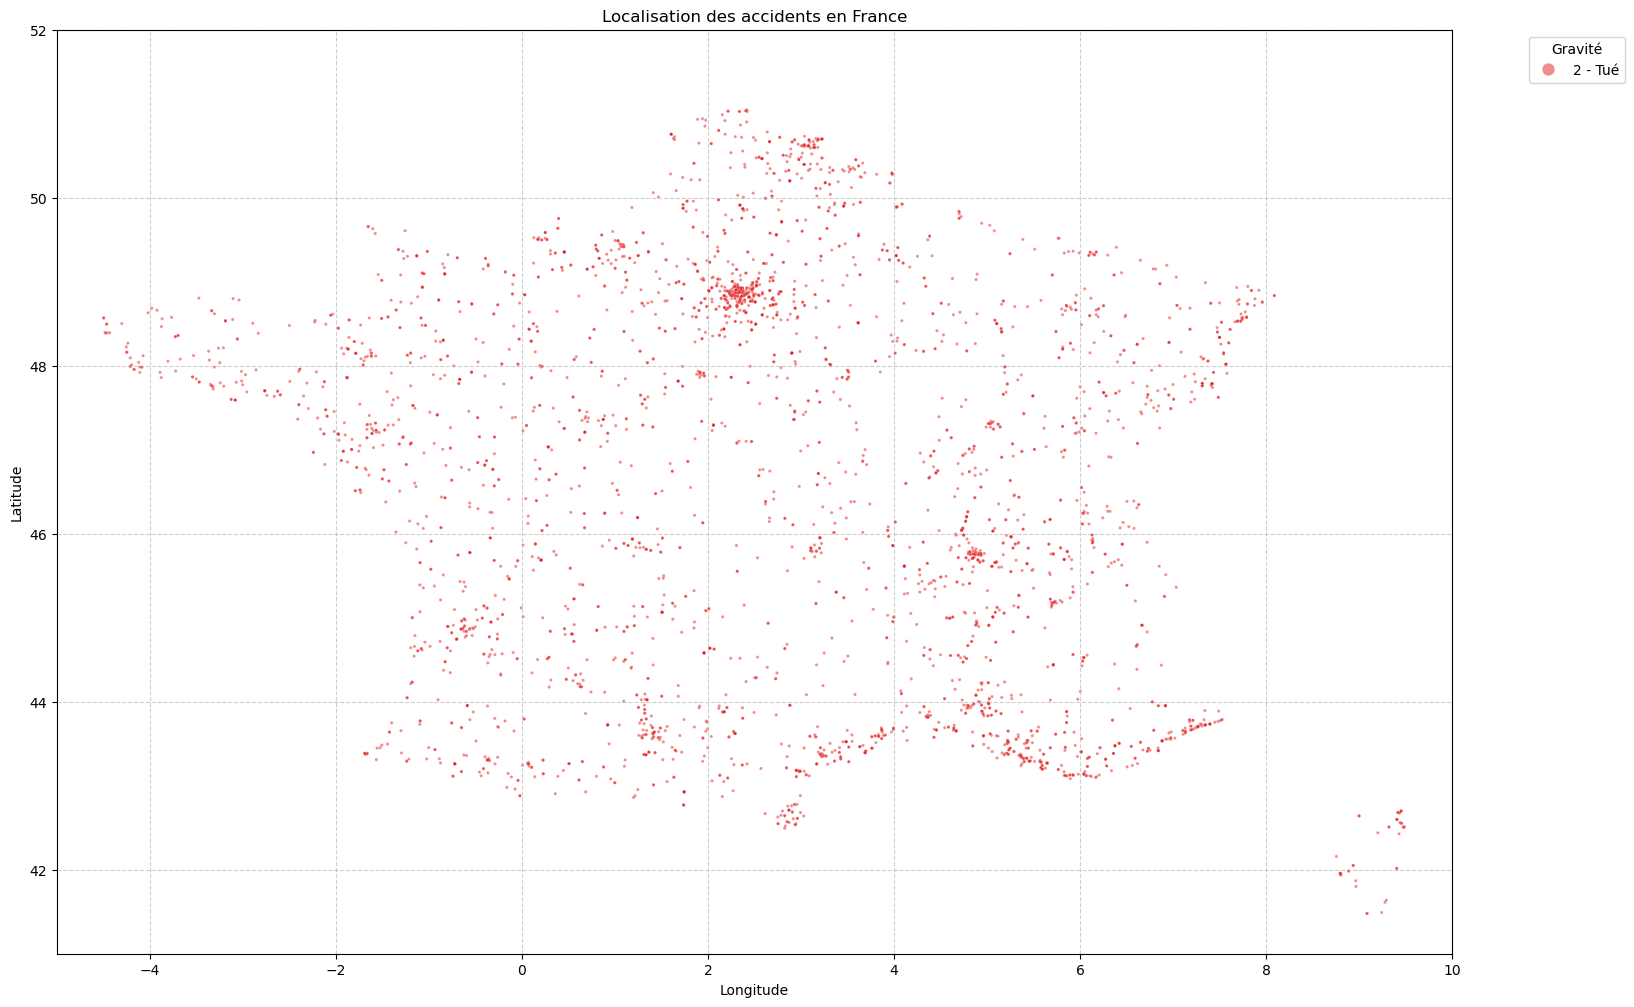

In [169]:
title = "Localisation des accidents en France"
alpha = 0.5
figsize = (18, 12)
point_size = 5
hue = "grav" 
palette =   {
        -1:"#FFFFFF", # Blanc pour les non renseignés
        1: "#4daf4a",  # Vert pour Indemne
        2: "#e41a1c",  # Rouge pour Tué
        3: "#ff7f00",  # Orange pour Blessé hospitalisé
        4: "#377eb8"   # Bleu pour Blessé léger
    }


fig, ax = plt.subplots(figsize=figsize)

sns.scatterplot(
    data=dataset[dataset["grav"] == 2],  
    x='long',
    y='lat',
    hue=hue,
    style=None,
    alpha=alpha,
    s=point_size,
    palette=palette,
    ax=ax
)

ax.set(
    title=title,
    xlabel='Longitude',
    ylabel='Latitude'
)


ax.set_xlim(-5, 10)
ax.set_ylim(41, 52)

ax.grid(True, linestyle='--', alpha=0.6)


gravity_descriptions = {
        -1: "Non renseigné",
        1: "Indemne",
        2: "Tué",
        3: "Blessé hospitalisé",
        4: "Blessé léger"
    }
    
handles, labels = ax.get_legend_handles_labels()
    
    
new_labels = []
for label in labels:
    try:
        code = int(label)
        if code in gravity_descriptions:
            new_labels.append(f"{code} - {gravity_descriptions[code]}")
        else:
            new_labels.append(label)
    except:
        new_labels.append(label)

ax.legend(handles, new_labels, title="Gravité", bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=4.0)   



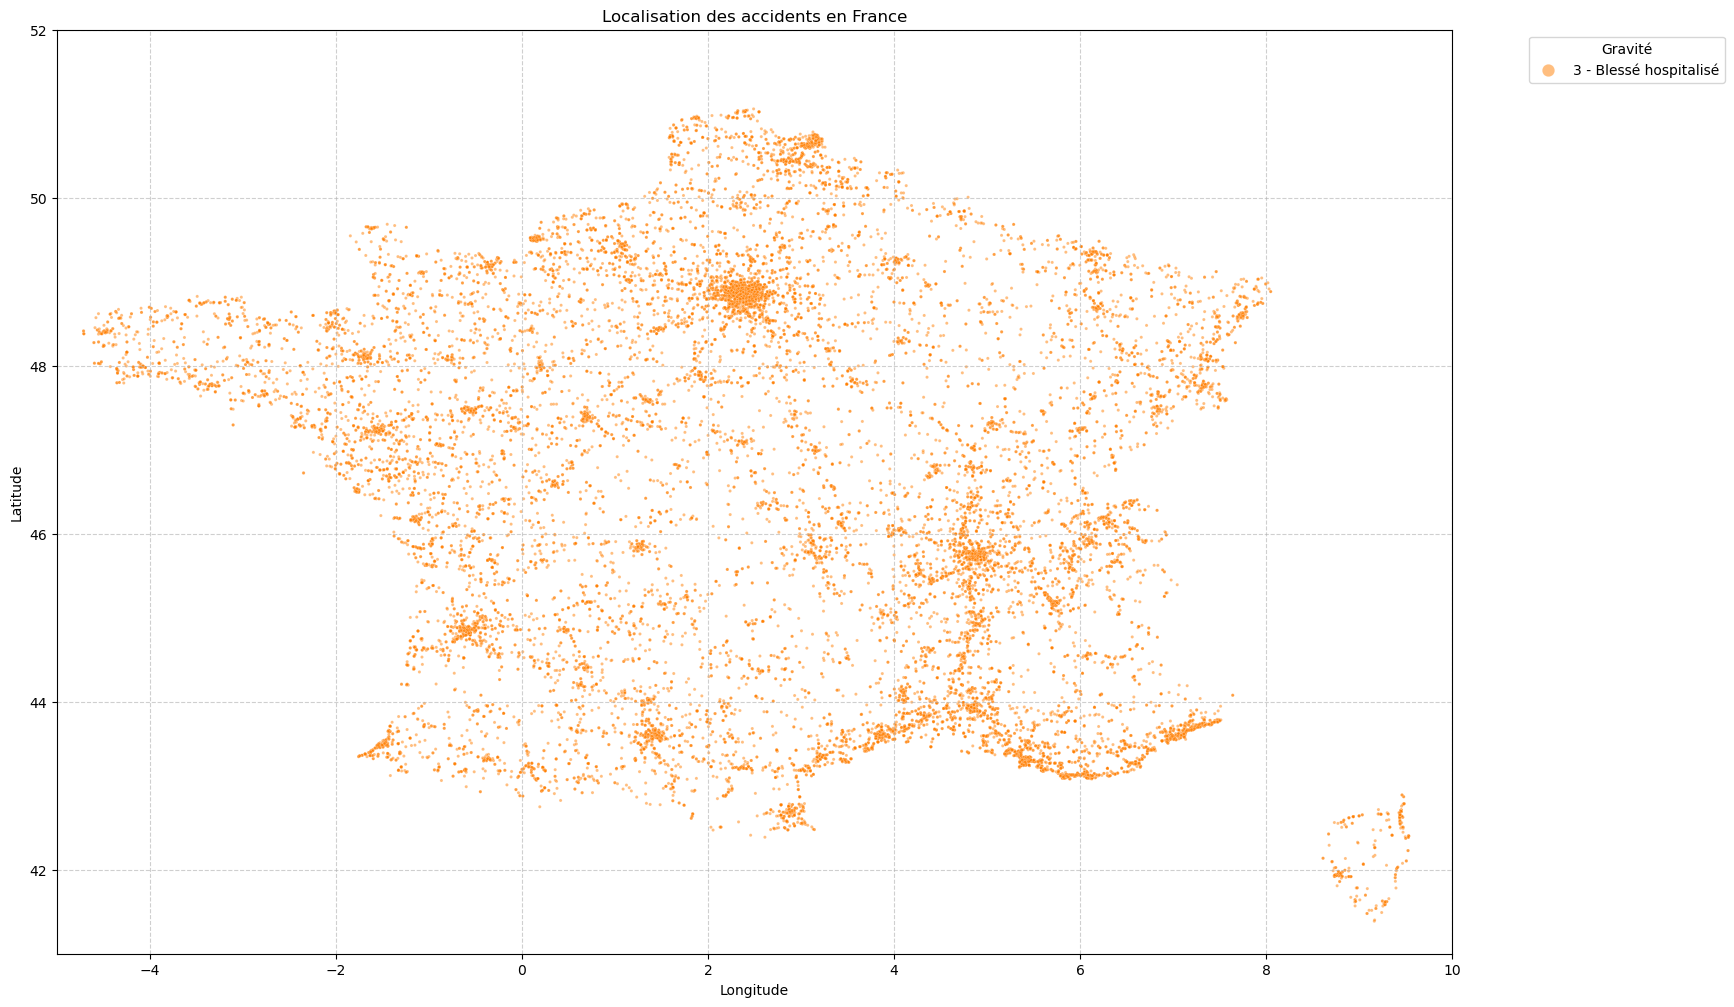

In [170]:
title = "Localisation des accidents en France"
alpha = 0.5
figsize = (18, 12)
point_size = 5
hue = "grav" 
palette =   {
        -1:"#FFFFFF", # Blanc pour les non renseignés
        1: "#4daf4a",  # Vert pour Indemne
        2: "#e41a1c",  # Rouge pour Tué
        3: "#ff7f00",  # Orange pour Blessé hospitalisé
        4: "#377eb8"   # Bleu pour Blessé léger
    }


fig, ax = plt.subplots(figsize=figsize)

sns.scatterplot(
    data=dataset[dataset["grav"] == 3],  
    x='long',
    y='lat',
    hue=hue,
    style=None,
    alpha=alpha,
    s=point_size,
    palette=palette,
    ax=ax
)

ax.set(
    title=title,
    xlabel='Longitude',
    ylabel='Latitude'
)


ax.set_xlim(-5, 10)
ax.set_ylim(41, 52)

ax.grid(True, linestyle='--', alpha=0.6)


gravity_descriptions = {
        -1: "Non renseigné",
        1: "Indemne",
        2: "Tué",
        3: "Blessé hospitalisé",
        4: "Blessé léger"
    }
    
handles, labels = ax.get_legend_handles_labels()
    
    
new_labels = []
for label in labels:
    try:
        code = int(label)
        if code in gravity_descriptions:
            new_labels.append(f"{code} - {gravity_descriptions[code]}")
        else:
            new_labels.append(label)
    except:
        new_labels.append(label)

ax.legend(handles, new_labels, title="Gravité", bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=4.0)   



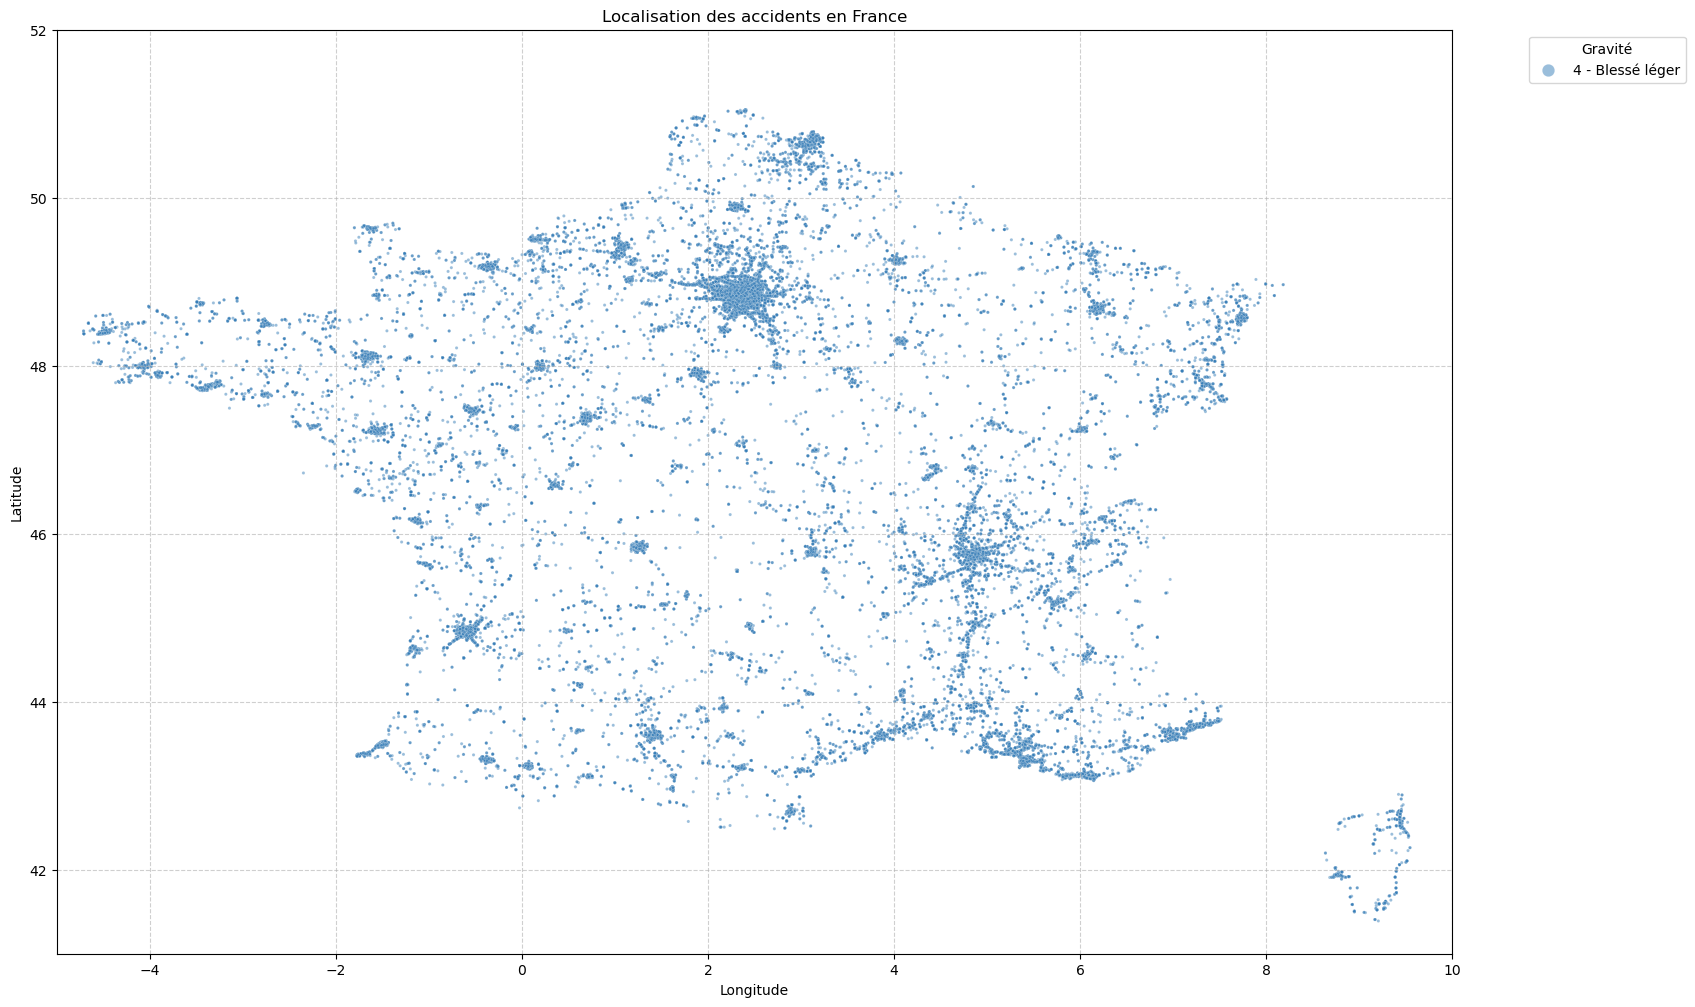

In [171]:
title = "Localisation des accidents en France"
alpha = 0.5
figsize = (18, 12)
point_size = 5
hue = "grav" 
palette =   {
        -1:"#FFFFFF", # Blanc pour les non renseignés
        1: "#4daf4a",  # Vert pour Indemne
        2: "#e41a1c",  # Rouge pour Tué
        3: "#ff7f00",  # Orange pour Blessé hospitalisé
        4: "#377eb8"   # Bleu pour Blessé léger
    }


fig, ax = plt.subplots(figsize=figsize)

sns.scatterplot(
    data=dataset[dataset["grav"] == 4],  
    x='long',
    y='lat',
    hue=hue,
    style=None,
    alpha=alpha,
    s=point_size,
    palette=palette,
    ax=ax
)

ax.set(
    title=title,
    xlabel='Longitude',
    ylabel='Latitude'
)


ax.set_xlim(-5, 10)
ax.set_ylim(41, 52)

ax.grid(True, linestyle='--', alpha=0.6)


gravity_descriptions = {
        -1: "Non renseigné",
        1: "Indemne",
        2: "Tué",
        3: "Blessé hospitalisé",
        4: "Blessé léger"
    }
    
handles, labels = ax.get_legend_handles_labels()
    
    
new_labels = []
for label in labels:
    try:
        code = int(label)
        if code in gravity_descriptions:
            new_labels.append(f"{code} - {gravity_descriptions[code]}")
        else:
            new_labels.append(label)
    except:
        new_labels.append(label)

ax.legend(handles, new_labels, title="Gravité", bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=4.0)   



On remarque une concetration d'accident léger et bénin dans les agglomérations

## 1. Netoyage des données (données manquates)


In [172]:
dataset_clean = dataset.copy()
print("Valeurs manquantes par colonne :")
print(dataset_clean.isna().sum())

Valeurs manquantes par colonne :
place           0
catu            0
sexe            0
trajet          0
secu1           0
secu2           0
secu3           0
locp            0
catv            0
an_nais      4597
mois            0
occutc     196783
obs             0
obsm            0
choc            0
manv            0
lum             0
agg             0
int             0
atm             0
col             0
catr            0
circ            0
vosp            0
prof            0
plan            0
surf            0
infra           0
situ            0
lat             0
long            0
hrmn            0
jour            0
grav            0
dtype: int64


* On constate alors qu'il y'a deux features qui contiennent pas mal de valeurs manquantes
    * an_nais      4597<br>
        • Sur 198 448 observations, 4 597 valeurs sont manquantes, ce qui représente environ 2,3 % du total.(ce taux est relativement faible, on peut donc envisager de les enlever du dataset
        
    * occutc     196783<br>
         • Avec 196 783 valeurs manquantes sur 198 448 observations, cette variable est quasiment entièrement absente, on peu donc envisager de suprimer cet feature complétement

In [173]:
print("Taille du dataset avant filtrage sur 'grav' :", dataset.shape)
dataset_valid = dataset_clean[dataset_clean['grav'].notna()]
print("Taille du dataset après filtrage sur 'grav' :", dataset_valid.shape)

Taille du dataset avant filtrage sur 'grav' : (198448, 34)
Taille du dataset après filtrage sur 'grav' : (198448, 34)


* c'est normal. Cela signifie que dans la colonne 'grav', il n'y a pas de valeurs manquantes, donc le filtre notna() ne supprime aucune ligne et le dataset conserve la même taille.

In [174]:
codes_manquants = [-1, '.']
colonnes_a_nettoyer = ['grav', 'hrmn', ]  # adaptez la liste des colonnes selon vos observations

for col in colonnes_a_nettoyer:
    dataset_clean[col] = dataset_clean[col].replace(codes_manquants, np.nan)

print("Après remplacement, valeurs manquantes par colonne :")
print(dataset_clean.isna().sum())
print("Taille du dataset avant filtrage sur 'grav' :", dataset.shape)
dataset_valid = dataset_clean[dataset_clean['grav'].notna()]
print("Taille du dataset après filtrage sur 'grav' :", dataset_valid.shape)

Après remplacement, valeurs manquantes par colonne :
place           0
catu            0
sexe            0
trajet          0
secu1           0
secu2           0
secu3           0
locp            0
catv            0
an_nais      4597
mois            0
occutc     196783
obs             0
obsm            0
choc            0
manv            0
lum             0
agg             0
int             0
atm             0
col             0
catr            0
circ            0
vosp            0
prof            0
plan            0
surf            0
infra           0
situ            0
lat             0
long            0
hrmn            0
jour            0
grav           72
dtype: int64
Taille du dataset avant filtrage sur 'grav' : (198448, 34)
Taille du dataset après filtrage sur 'grav' : (198376, 34)


* Aprés traitement sur la colonne "grav" : les valeurs manquantes (72) représentent un très faible pourcentage du dataset (~0,036%), les supprimer ne devrait pas impacter le modèle.<br> 
* il est aussi utile de comparer les performances du modèle en laissant ces lignes

### 1.1  Aprés traitement des données manquantes

In [175]:
dataset_clean = dataset_clean.drop(columns=['occutc'])
median_an_nais = dataset_clean['an_nais'].median()
dataset_clean['an_nais'] = dataset_clean['an_nais'].fillna(median_an_nais)
dataset_final = dataset_clean[dataset_clean['grav'].notna()]

In [176]:
print(dataset_clean.columns)

Index(['place', 'catu', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp',
       'catv', 'an_nais', 'mois', 'obs', 'obsm', 'choc', 'manv', 'lum', 'agg',
       'int', 'atm', 'col', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf',
       'infra', 'situ', 'lat', 'long', 'hrmn', 'jour', 'grav'],
      dtype='object')


* Ce nouveau dataset "dataset_final" est prêt pour les étapes suivantes et l'entraînement du modèle.

## 2. Netoyage des données (données abérantes)


* Avant de passer à la prochaine étape, on va d'abord faire un traitement sur la variable catégorielle "hrmn"

In [177]:
print(dataset_clean['hrmn'].head(10))

0    16:35
1    17:20
2    16:50
3    18:00
4    17:35
5    12:10
6    15:45
7    18:15
8    13:30
9    03:35
Name: hrmn, dtype: object


* Ce calcule nous permet d'avoir une vision sur comment est la structure de l'heure minute

In [178]:
dataset_clean['hrmn'] = dataset_clean['hrmn'].str.replace(':', '', regex=False)
dataset_clean['hrmn'] = pd.to_numeric(dataset_clean['hrmn'], errors='coerce')
print(dataset_clean['hrmn'].head(10))
print("Nombre de NaN dans 'hrmn' après conversion :", dataset_clean['hrmn'].isna().sum())


0    1635
1    1720
2    1650
3    1800
4    1735
5    1210
6    1545
7    1815
8    1330
9     335
Name: hrmn, dtype: int64
Nombre de NaN dans 'hrmn' après conversion : 0


### 2.1 Utiliser des bornes issues de la connaissance du domaine

La méthode la plus simple (et souvent la plus pertinente) consiste à définir des intervalles de valeurs plausibles en fonction du contexte :

- **lat (latitude en France)** : entre **41** et **52**
- **long (longitude en France)** : entre **-5** et **10**
- **hrmn (heure-minute)** : entre **0** et **2359**
- **an_nais (année de naissance)** : par exemple entre **1900** et **2025**

### Justification

- **Latitude & Longitude**  
  Ces bornes sont établies à partir de la localisation géographique de la France métropolitaine, qui se situe approximativement entre 41° et 52° de latitude, et entre -5° et 10° de longitude.

- **Heure-minute (hrmn)**  
  En format « HHMM », la valeur minimale est 0 (minuit) et la valeur maximale est 2359 (une minute avant minuit).

- **Année de naissance (an_nais)**  
  Ces bornes permettent d'exclure les valeurs aberrantes, car il est peu probable que des individus nés avant 1900 ou après 2025 soient impliqués dans les accidents analysés.


In [179]:
dataset_clean = dataset_clean[
    (dataset_clean['lat'] >= 41) & (dataset_clean['lat'] <= 52) &
    (dataset_clean['long'] >= -5) & (dataset_clean['long'] <= 10) &
    (dataset_clean['hrmn'] >= 0) & (dataset_clean['hrmn'] <= 2359) &
    (
        dataset_clean['an_nais'].isna() | 
        ((dataset_clean['an_nais'] >= 1900) & (dataset_clean['an_nais'] <= 2025))
    )
]

print("Taille du dataset après filtrage :", dataset_clean.shape)

Taille du dataset après filtrage : (187995, 33)


* Nous avons éliminé les lignes du dataset qui contenaient des valeurs aberrantes pour ces variables. Cela se reflète dans la réduction du nombre d'observations, passant de 198 448 à 187 995.

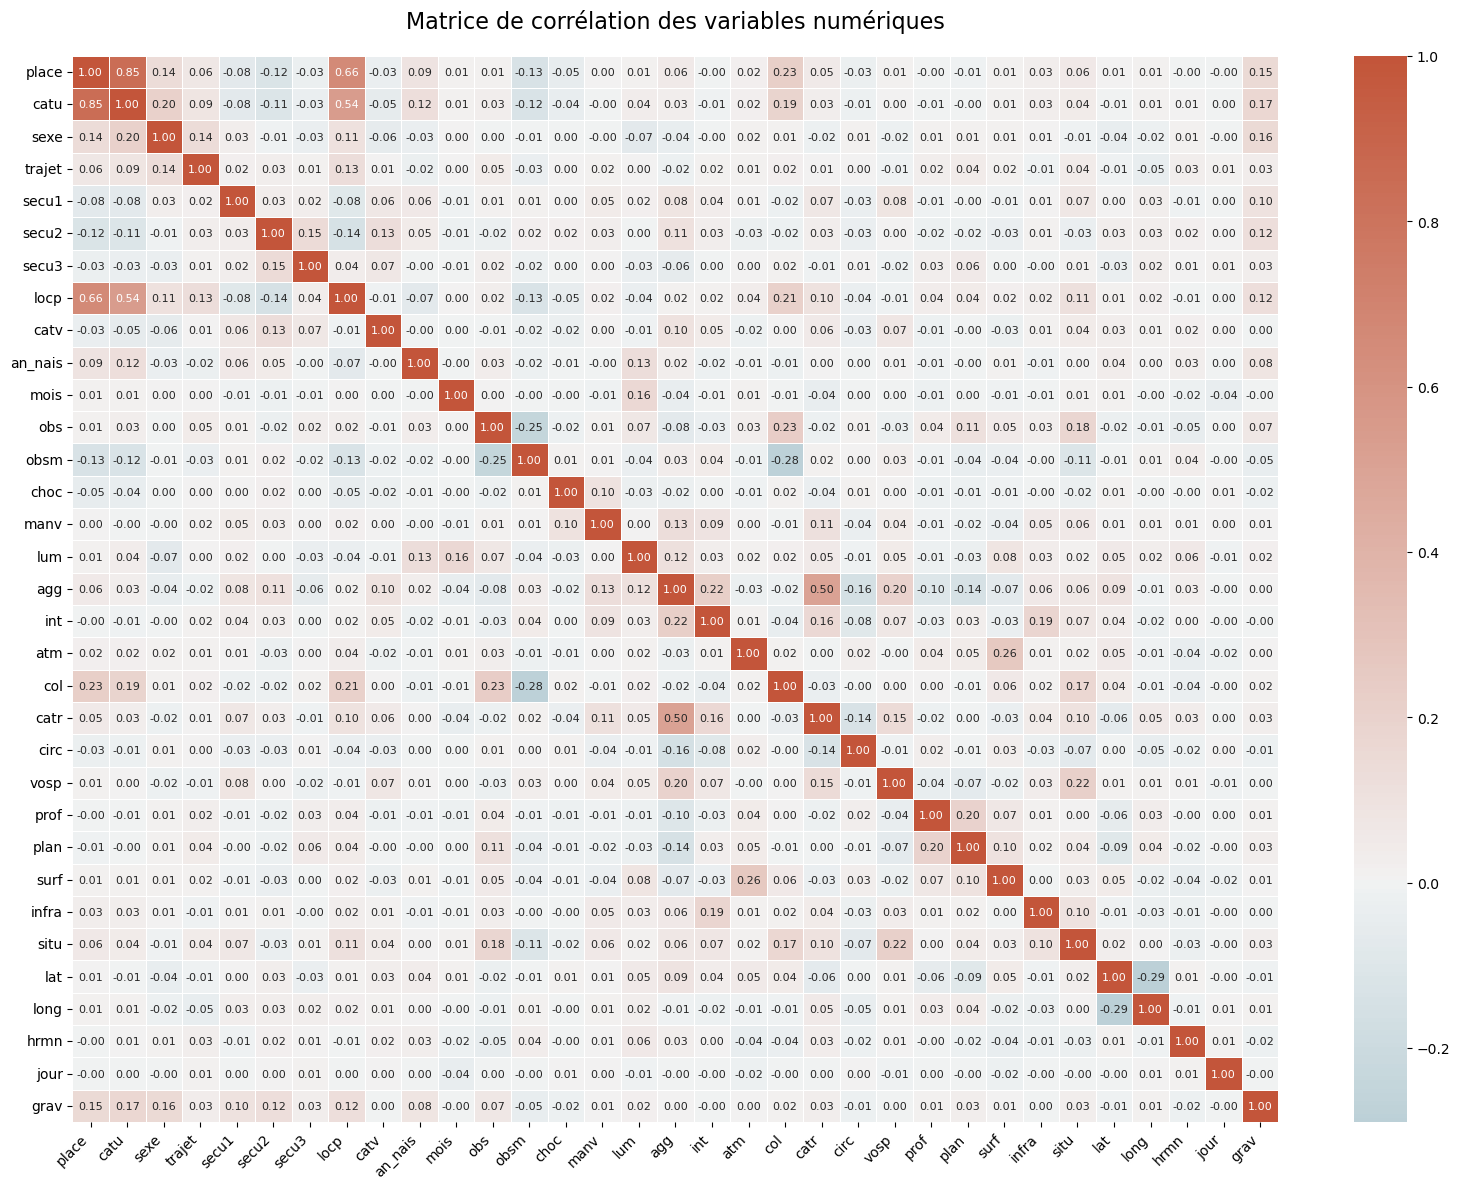

In [180]:
numeric_cols = dataset_clean.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = dataset_clean[numeric_cols].corr()
custom_cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,         
    fmt=".2f",    
    cmap=custom_cmap, 
    center=0,
    linewidths=0.5,
    annot_kws={"size": 8}
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Matrice de corrélation des variables numériques", fontsize=16, pad=20)

plt.tight_layout()

plt.show()


### Analyse de la matrice de corrélation

Après examen attentif de la matrice de corrélation, voici les principales observations :

#### **Variables fortement corrélées :**
Ces variables présentent des coefficients de corrélation significatifs :

- **`place` avec `locp` :** **0.66**
  - La place occupée par l'usager est trés liée à la localisation

- **`place` avec `catu` :** **0.85**
  - La catégorie d'usager est trés liée à la place occupée.

- **`obs` avec `obsm` :** **0.56**
  - Association logique entre obstacles fixes et obstacles mobiles percutés lors des accidents.

#### **Variables faiblement corrélées (corrélation modérée à faible) :**
Ces variables montrent une relation modérée à faible

- `col` avec  `catr` : **0.29**
- `circ` aevc `col` : **0.29**
- `catr` avec  `col` : **0.29**


#### **Absence de forte corrélation avec la cible (`grav`) :**
- La variable cible (`grav`) présente de faibles corrélations avec les autres variables numériques du dataset

## Conséquences sur le dataset_clean
* Supprimer place ou catu (fortement corrélées).
* Supprimer éventuellement obs ou obsm
#### Ces modifications n'auront aucune influences sur le dataset, et on perdra pas d'informations car il s'agit d'une redendance

In [181]:
print("Taille du dataset avant suppression :", dataset_clean.shape)
colonnes_a_supprimer = [col for col in dataset_clean.columns if 'place' in col or 'obsm' in col]
dataset_clean = dataset_clean.drop(columns=colonnes_a_supprimer)

print("Colonnes supprimées :", colonnes_a_supprimer)
print("Taille du dataset après suppression :", dataset_clean.shape)

Taille du dataset avant suppression : (187995, 33)
Colonnes supprimées : ['place', 'obsm']
Taille du dataset après suppression : (187995, 31)


## 3. Traitement des caractéristiques

In [182]:
dataset_clean['heure'] = dataset_clean['hrmn'] // 100


dataset_clean['age'] = 2025 - dataset_clean['an_nais']
ages = [0, 18, 25, 35, 45, 60, 75, 100]
tranches = ['0-17', '18-24', '25-34', '36-49', '50-64', '65-80', '81+']

dataset_clean['tranche_age'] = pd.cut(dataset_clean['age'], bins=ages, labels=tranches, right=False)
print(dataset_clean[['age', 'tranche_age']].value_counts())
dataset_clean = dataset_clean.dropna()

age   tranche_age
39.0  36-49          7735
25.0  25-34          5836
24.0  18-24          5506
26.0  25-34          5460
27.0  25-34          5087
                     ... 
95.0  81+             143
96.0  81+              69
97.0  81+              60
98.0  81+              44
99.0  81+              24
Name: count, Length: 96, dtype: int64



* Ces deux lignes de code créent de nouvelles caractéristiques (features) utiles pour le modèle :

- `dataset_clean['heure'] = dataset_clean['hrmn'] // 100`  
  **Extrait l'heure** à partir de la colonne `hrmn`. Par exemple, `1635` (16h35) devient simplement `16`.

- `dataset_clean['age'] = 2025 - dataset_clean['an_nais']`  
  Calcule l'**âge de l'usager** à partir de son année de naissance.<br>
  
Ces features sont maintenant faciles à interpréter.<br>
Apportent une meilleure granularité à tes données (l’heure précise pourrait être trop détaillée, et l'année de naissance moins directement exploitable que l’âge).

In [183]:
print(dataset_clean.nunique())

catu               3
sexe               3
trajet             8
secu1             11
secu2             11
secu3              9
locp              11
catv              32
an_nais           96
mois              12
obs               19
choc              11
manv              28
lum                5
agg                2
int                9
atm               10
col                8
catr               8
circ               5
vosp               5
prof               5
plan               5
surf              10
infra             11
situ               8
lat            49573
long           49852
hrmn            1359
jour              31
grav               4
heure             24
age               96
tranche_age        7
dtype: int64


* On remarque que certaine données ont trés peutde valeures unique, ce qui nous indique qu'elles sont peut être catégorielles

In [186]:
colonnes_categorielles = [
     'catu', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'locp',
    'catv', 'mois', 'obs', 'choc', 'manv', 'lum', 'agg', 'int',
    'atm', 'col', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra',
    'situ', 'jour', 'heure', 'grav', 'tranche_age', 'heure'
]

for col in colonnes_categorielles:
    dataset_clean[col] = dataset_clean[col].astype('category')
print(dataset_clean.shape)


(187878, 34)


**Remarque :**  
Comme vu en cours, le **One-Hot encoding** permet de transformer les variables catégorielles en coordonnées numériques exploitables par le modèle.


In [187]:
dataset_encoded = pd.get_dummies(dataset_clean, columns=colonnes_categorielles, drop_first=True).astype(int)

### 3.1 Examinant un peut le dataset actuel

In [188]:
print(dataset_encoded.head())

   an_nais  lat  long  hrmn  age  catu_2  catu_3  sexe_1  sexe_2  trajet_0  \
0     1970   50     1  1635   55       0       0       1       0         0   
1     2001   43     3  1720   24       1       0       0       1         0   
2     1986   43     3  1650   39       0       0       1       0         1   
3     1989   48     2  1800   36       0       0       0       1         0   
4     2002   47     0  1735   23       0       0       1       0         0   

   trajet_1  trajet_2  trajet_3  trajet_4  trajet_5  trajet_9  secu1_0  \
0         0         0         0         0         1         0        0   
1         0         0         0         0         1         0        0   
2         0         0         0         0         0         0        0   
3         1         0         0         0         0         0        0   
4         0         0         0         0         0         1        0   

   secu1_1  secu1_2  secu1_3  secu1_4  secu1_5  secu1_6  secu1_7  secu1_8  \
0        

In [189]:
print(dataset_encoded.dtypes)

an_nais     int64
lat         int64
long        int64
hrmn        int64
age         int64
            ...  
heure_19    int64
heure_20    int64
heure_21    int64
heure_22    int64
heure_23    int64
Length: 314, dtype: object


* On constate que le dataset encodé est désormais propre, cohérent, et prêt à être utilisé pour entraîner notremodéle

## 4. Explorations du dataset encodé

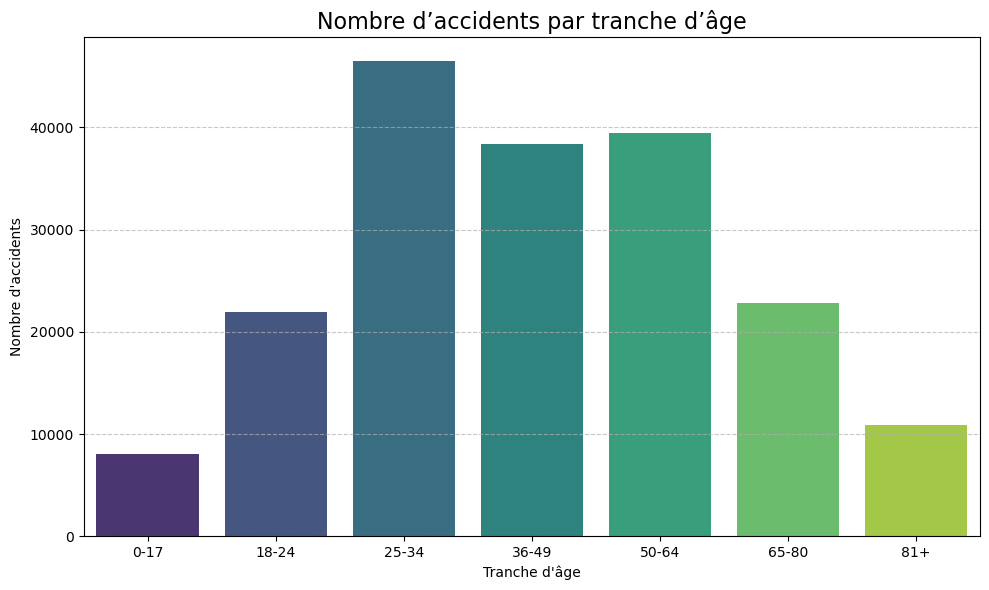

In [190]:
age_counts = dataset_clean['tranche_age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, hue=age_counts.index, palette='viridis', legend=False)

plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre d'accidents")
plt.title("Nombre d’accidents par tranche d’âge", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#---------------------------------------------------------------------------------------


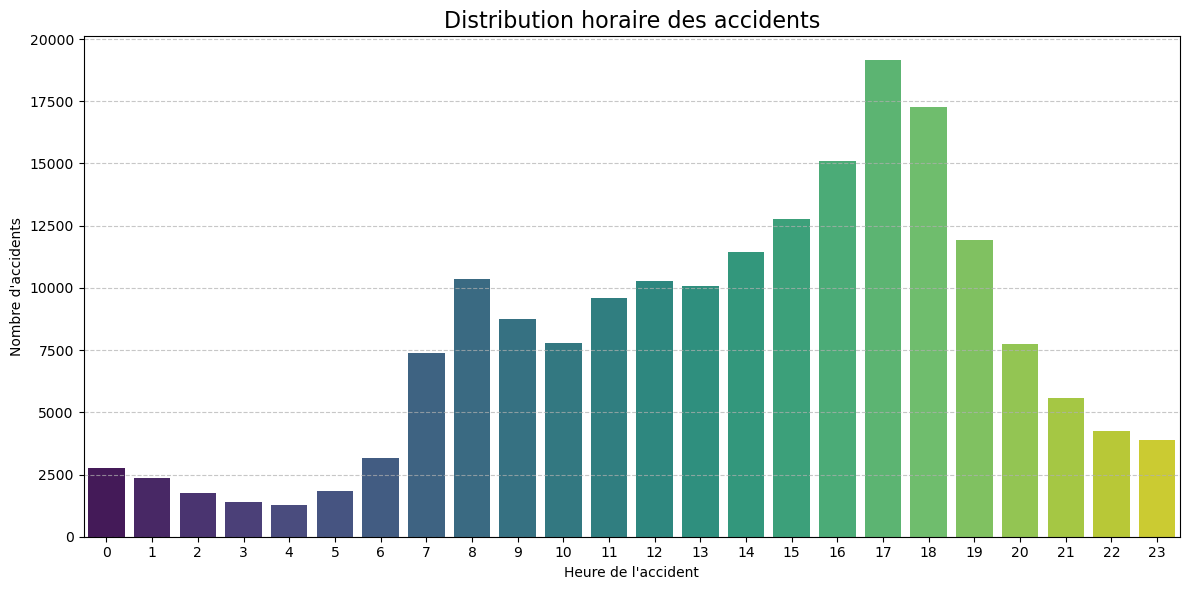

In [191]:
heure_counts = dataset_clean['heure'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

sns.barplot(
    x=heure_counts.index,
    y=heure_counts.values,
    hue=heure_counts.index, 
    palette='viridis',
    legend=False
)

plt.title("Distribution horaire des accidents", fontsize=16)
plt.xlabel("Heure de l'accident")
plt.ylabel("Nombre d'accidents")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Remarque :**  
Après avoir effectué toutes ces étapes de nettoyage, et d'encodage les données sont désormais bien structurées et cohérentes. Les graphiques obtenus sont nettement plus lisibles, facilitant grandement l’interprétation